In [0]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
date_chunks = pd.read_csv("train_date.csv", index_col=0, chunksize=100000, dtype=np.float32)

In [0]:
for chunk in date_chunks:
    print(chunk.head())
    break

         L0_S0_D1     L0_S0_D3     L0_S0_D5     L0_S0_D7     L0_S0_D9  \
Id                                                                      
4.0     82.239998    82.239998    82.239998    82.239998    82.239998   
6.0           NaN          NaN          NaN          NaN          NaN   
7.0   1618.699951  1618.699951  1618.699951  1618.699951  1618.699951   
9.0   1149.199951  1149.199951  1149.199951  1149.199951  1149.199951   
11.0   602.640015   602.640015   602.640015   602.640015   602.640015   

        L0_S0_D11    L0_S0_D13    L0_S0_D15    L0_S0_D17    L0_S0_D19  \
Id                                                                      
4.0     82.239998    82.239998    82.239998    82.239998    82.239998   
6.0           NaN          NaN          NaN          NaN          NaN   
7.0   1618.699951  1618.699951  1618.699951  1618.699951  1618.699951   
9.0   1149.199951  1149.199951  1149.199951  1149.199951  1149.199951   
11.0   602.640015   602.640015   602.640015   602.

The data for this competition represents measurements of parts as they move through Bosch's production lines. Each part has a unique Id. The goal is to predict which parts will fail quality control (represented by a 'Response' = 1).

The dataset contains an extremely large number of anonymized features. Features are named according to a convention that tells you the production line, the station on the line, and a feature number. E.g. L3_S36_F3939 is a feature measured on line 3, station 36, and is feature number 3939.

On account of the large size of the dataset, we have separated the files by the type of feature they contain: numerical, categorical, and finally, a file with date features. The date features provide a timestamp for when each measurement was taken. Each date column ends in a number that corresponds to the previous feature number. E.g. the value of L0_S0_D1 is the time at which L0_S0_F0 was taken.

In addition to being one of the largest datasets (in terms of number of features) ever hosted on Kaggle, the ground truth for this competition is highly imbalanced. Together, these two attributes are expected to make this a challenging problem.

**Description**

train_numeric.csv - the training set numeric features (this file contains the 'Response' variable)

test_numeric.csv - the test set numeric features (you must predict the 'Response' for these Ids)

train_categorical.csv - the training set categorical features

test_categorical.csv - the test set categorical features

train_date.csv - the training set date features

test_date.csv - the test set date features

sample_submission.csv - a sample submission file in the correct format

In [0]:
num_chunks = pd.read_csv("train_numeric.csv", index_col=0, usecols=list(range(969)), chunksize=100000, dtype=np.float32)

In [0]:
for chunk in num_chunks:
    print(print(chunk.head()))
    break

      L0_S0_F0  L0_S0_F2  L0_S0_F4  L0_S0_F6  L0_S0_F8  L0_S0_F10  L0_S0_F12  \
Id                                                                             
4.0      0.030    -0.034    -0.197    -0.179     0.118      0.116     -0.015   
6.0        NaN       NaN       NaN       NaN       NaN        NaN        NaN   
7.0      0.088     0.086     0.003    -0.052     0.161      0.025     -0.015   
9.0     -0.036    -0.064     0.294     0.330     0.074      0.161      0.022   
11.0    -0.055    -0.086     0.294     0.330     0.118      0.025      0.030   

      L0_S0_F14  L0_S0_F16  L0_S0_F18      ...       L3_S50_F4243  \
Id                                         ...                      
4.0      -0.032      0.020      0.083      ...                NaN   
6.0         NaN        NaN        NaN      ...                NaN   
7.0      -0.072     -0.225     -0.147      ...                NaN   
9.0       0.128     -0.026     -0.046      ...                NaN   
11.0      0.168     -0.16

In [0]:
X = pd.concat([pd.concat([dchunk, nchunk], axis=1).sample(frac=0.05)
               for dchunk, nchunk in zip(date_chunks, num_chunks)])

In [0]:
y = pd.read_csv("train_numeric.csv", index_col=0, usecols=[0,969], dtype=np.float32).loc[X.index].values.ravel()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
X = X.values

In [0]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [0]:
y.sum()

317.0

In [0]:
len(y)

54187

In [0]:
y.sum()/len(y)

0.005850111650395852

In [0]:
clf = XGBClassifier(base_score=0.005)
clf.fit(X, y)

XGBClassifier(base_score=0.005, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Save Model

In [0]:
import sys
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


In [0]:
import pickle

In [0]:
# save the model to disk
filename = 'XGBoost_Model.sav'
pickle.dump(clf, open(filename, 'wb'))

### Load Model

In [0]:
# load the model from disk
myModel = pickle.load(open(filename, 'rb'))

[  50   76  393  883  939 1018 1019 1029 1156 1169 1171 1173 1178 1194
 1196 1202 1203 1210 1219 1227 1228 1233 1236 1245 1249 1254 1263 1277
 1297 1310 1408 1516 1542 1549 1550 1618 1837 1838 1843 1846 1879 1880
 1885 1889 1890 1892 1893 1899 1911 1927 1932 1944 1959 1966 1968 1974
 1983 1984 1985 1987 1988 1990 1994 1995 1997 2006 2007 2010 2018 2022
 2028 2084 2093 2107]


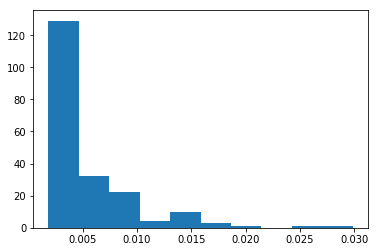

In [0]:
# threshold for a manageable number of features
plt.hist(myModel.feature_importances_[myModel.feature_importances_>0])
important_indices = np.where(myModel.feature_importances_>0.005)[0]
print(important_indices)

### Model for entire data

In [0]:
# load entire dataset for these features. 
# note where the feature indices are split so we can load the correct ones straight from read_csv
n_date_features = 1156
X = np.concatenate([
    pd.read_csv("train_date.csv", index_col=0, dtype=np.float32,
                usecols=np.concatenate([[0], important_indices[important_indices < n_date_features] + 1])).values,
    pd.read_csv("train_numeric.csv", index_col=0, dtype=np.float32,
                usecols=np.concatenate([[0], important_indices[important_indices >= n_date_features] + 1 - 1156])).values
                ], axis=1)
y = pd.read_csv("train_numeric.csv", index_col=0, dtype=np.float32, usecols=[0,969]).values.ravel()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
clf_full_data = XGBClassifier(max_depth=5, base_score=0.005)
skf = StratifiedKFold()
skf.get_n_splits(X, y)
preds = np.ones(y.shape[0])
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]
    
    preds[test_index] = clf_full_data.fit(X[train_index], y[train_index]).predict_proba(X[test_index])[:,1]
    print("ROC AUC: ", roc_auc_score(y[test_index], preds[test_index]))

TRAIN: [ 394571  394572  394573 ... 1183744 1183745 1183746] TEST: [     0      1      2 ... 395664 395665 395695]
ROC AUC:  0.7192622140871269
TRAIN: [      0       1       2 ... 1183744 1183745 1183746] TEST: [394571 394572 394573 ... 790831 790909 790942]
ROC AUC:  0.7020203750588716
TRAIN: [     0      1      2 ... 790831 790909 790942] TEST: [ 789150  789151  789152 ... 1183744 1183745 1183746]
ROC AUC:  0.6941438910222872


In [0]:
print(roc_auc_score(y, preds))

0.7047588696721703


### Save Model - Full Data

In [0]:
# save the model to disk
filename = 'XGBoost_Model_Full_Data.sav'
pickle.dump(clf_full_data, open(filename, 'wb'))

### Load Model - Full Data

In [0]:
# load the model from disk
clf_full_data = pickle.load(open(filename, 'rb'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.19472164446301074


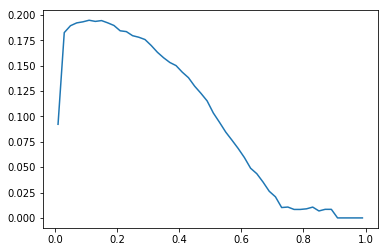

In [0]:
# pick the best threshold out-of-fold
thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([matthews_corrcoef(y, preds>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print(mcc.max())

In [0]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [0]:
confusion_matrix(y, preds>0.08)

array([[1173116,    3752],
       [   5738,    1141]], dtype=int64)

In [0]:
y.shape

(1183747,)

In [0]:
y.sum()

6879.0

In [0]:
preds[preds>.02].shape

(9665,)

In [0]:
fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)

In [0]:
%config InlineBackend.figure_format = 'retina'

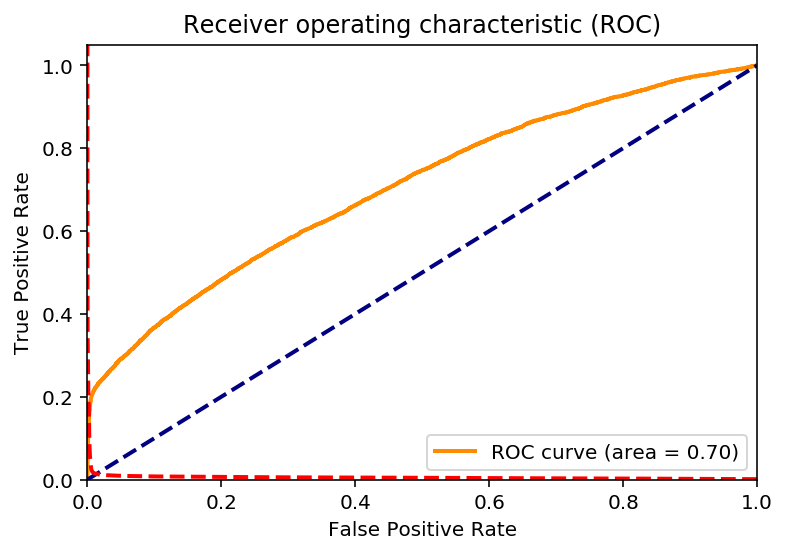

In [0]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr, threshold, color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

(0.0, 0.02)

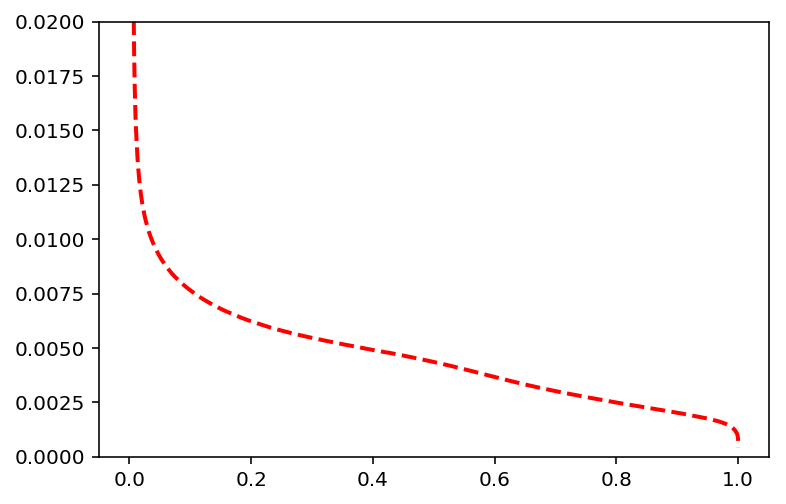

In [0]:
plt.plot(fpr, threshold, color='red', lw=2, linestyle='--')
plt.ylim([0.0, 0.02])